In [39]:
import numpy as np
import moments
import os
import pandas as pd
import gzip
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!cat data/spectrums/5d-csq-synonymous-stats.txt

Total SNPs: 135459


    SNPs discarded: 9362, 6.911 %
        Why?:
            - low confident (acgt): 5763
            - failure (N): 125
            - extant species contains insertion (-): 599
            - no coverage in aligment (.): 2393
            - ancestral high confidence but is not ALT or REF: 482


    SNPs kept (only high confidence: ACGT): 126097,  93.089 %
            - REF is AA: 118121
            - ALT is AA: 7976

    

In [3]:
def load_spectrum(file, compresed=True):
    """Load the SFS"""
    if compresed:
        with gzip.open(file, 'rb') as f:
            return pickle.load(f)
    else:
        with open(file, 'rb') as f:
            return pickle.load(f)

        

var_clas = ('synonymous', 'missense', 'intergenic', 'lof')

# load class
catfile = lambda x: 'data/spectrums/' + '5d-csq-' + x + '-spectrum.pkl.gz'

sfss = {x: load_spectrum(catfile(x)) for x in var_clas}

In [4]:
# marginalize for mxl
mxl = {x: sfss[x].marginalize([0, 1, 2, 4]) for x in sfss}

In [5]:
mxl_1d_lof = load_spectrum('data/spectrums/1d-csq-lof-spectrum.pkl', False)

## Test

Marginalized spectrum matches values in spectrum computed with only one population SFS.

In [6]:
# test (all must be True)
mxl_1d_lof == mxl['lof']

Spectrum([-- True True True True True True True True True True True True True True
 True True True True True True True True True True True True True True
 True True True True True True True True True True True True True True
 True True True True True True True --], folded=False, pop_ids=['MXL'])

In [7]:
mxl['lof'].shape

(51,)

In [8]:
mxl['lof'][1:-1].shape

(49,)

In [9]:
mxl_df = pd.DataFrame({x: mxl[x][1:-1] for x in mxl})
mxl_df['Frq'] = range(1, mxl_df.shape[0] + 1)

In [10]:
mxl_df.to_csv('results/mxl.csv', index=False)

In [11]:
mxl['missense'].Fst()

nan

In [12]:
syn = sfss['synonymous']
syn.pop_ids

['CHB', 'IBS', 'MXB', 'MXL', 'YRI']

In [13]:
syn.pop_ids

['CHB', 'IBS', 'MXB', 'MXL', 'YRI']

In [38]:
?plt.show

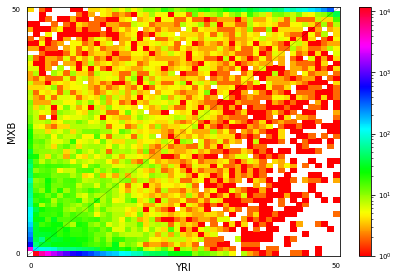

<Figure size 432x288 with 0 Axes>

In [40]:
moments.Plotting.plot_single_2d_sfs(syn.marginalize([0, 1, 3]))
plt.savefig('figures/2d-mxb-yri.png')

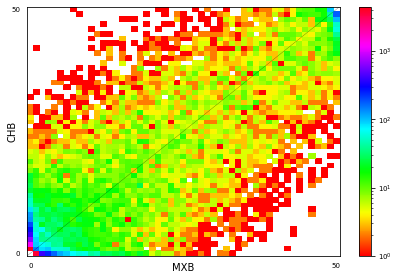

<Figure size 432x288 with 0 Axes>

In [41]:
moments.Plotting.plot_single_2d_sfs(syn.marginalize([1, 3, 4]))
plt.savefig('figures/2d-mxb-chb.png')
plt.show()

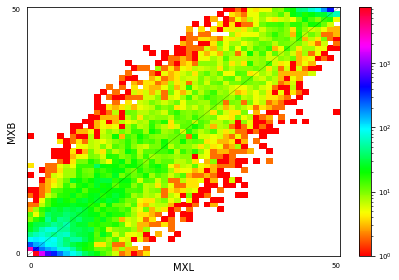

<Figure size 432x288 with 0 Axes>

In [42]:
moments.Plotting.plot_single_2d_sfs(syn.marginalize([0, 1, 4]))
plt.savefig('figures/2d-mxb-mxl.png')
plt.show()